In [1]:
# prerequisites
# pip install networkx, matplotlib, xlrd and pandas modules

import matplotlib.pyplot as plt
import pandas as pd
from pert import *  # import pert.py file
from IPython.display import display, HTML

In [2]:
# read project's data saved i ProjectData.xls file
file = "ProjectData.xls"
read_data_file(file)

In [3]:
projects_data = get_project_data()
proj_df = pd.DataFrame.from_dict(
            projects_data, 
            columns=['Activity', 'Predecessor', 'Duration'], orient="index")
# Show projects data in excel
display(HTML(proj_df.to_html(index=False)))

Activity,Predecessor,Duration
A,[Start],7.0
B,[Start],9.0
C,[A],12.0
D,"[A, B]",8.0
E,[D],9.0
F,"[C, E]",6.0
G,[E],5.0


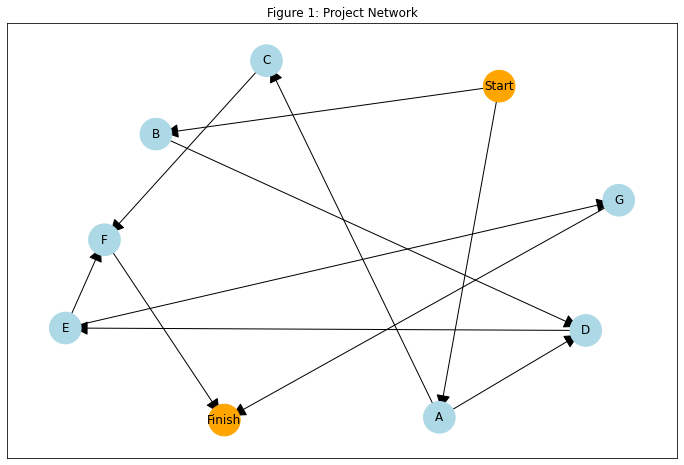

<Figure size 432x288 with 0 Axes>

In [4]:
mydata = defaultdict(list)
mydata['TASKS'] = {k: k for k in tasks.keys()}

# 1. Construct the Project Network
G = nx.DiGraph()
plot_title = "Figure 1: Project Network"
plt.figure(plot_title, figsize=(12,8))  
plt.title(plot_title)
draw_network(G)
plt.savefig("Project_Network.png")
 
plt.show()
# clearing the current plot
plt.clf()

In [5]:
# 2. Perform the forward and backward passes

# Computes the Earliest Start Time and Earliest Finish Time
forward_pass(mydata)
print("Earliest Start Times: ", mydata['ES'])
print("Earliest Finish Times: ", mydata['EF'])

Earliest Start Times:  {'A': 0.0, 'B': 0.0, 'C': 7.0, 'D': 9.0, 'E': 17.0, 'F': 26.0, 'G': 26.0, 'Finish': 32.0}
Earliest Finish Times:  {'A': 7.0, 'B': 9.0, 'C': 19.0, 'D': 17.0, 'E': 26.0, 'F': 32.0, 'G': 31.0, 'Finish': 32.0}


In [6]:
completion_time = get_completion_time(mydata['EF'])

# Set the Finish Time
tasks['Finish'] = completion_time

# Compute the Earliest Start Time and Earliest Finish Time
successors = get_successors(G)
backward_pass(mydata, successors)

print("Latest Start Times: ", mydata['LS'])
print("Latest Finish Times: ", mydata['LF'])

Latest Start Times:  {'Start': 0.0, 'G': 27.0, 'F': 26.0, 'E': 17.0, 'D': 9.0, 'C': 14.0, 'B': 0.0, 'A': 2.0}
Latest Finish Times:  {'Start': 0.0, 'G': 32.0, 'F': 32.0, 'E': 26.0, 'D': 17.0, 'C': 26.0, 'B': 9.0, 'A': 9.0}


In [7]:
# 3. Determine the project completion time
print("Project Completion Time: ", completion_time)

Project Completion Time:  32.0


In [8]:
# 4. Compute Slack and Get Critical Nodes/Edges
compute_slack_values(mydata)
print("Slack values: ", mydata['SLACK'])

Slack values:  {'A': 2.0, 'B': 0.0, 'C': 7.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 1.0, 'Start': 0.0, 'Finish': 0.0}


In [9]:
# 5. Determine the Critical Path
critical_path = format_critical_path(mydata['CRITICAL_PATH'])
print("Critical Path: ", critical_path)

Critical Path:  B->D->E->F


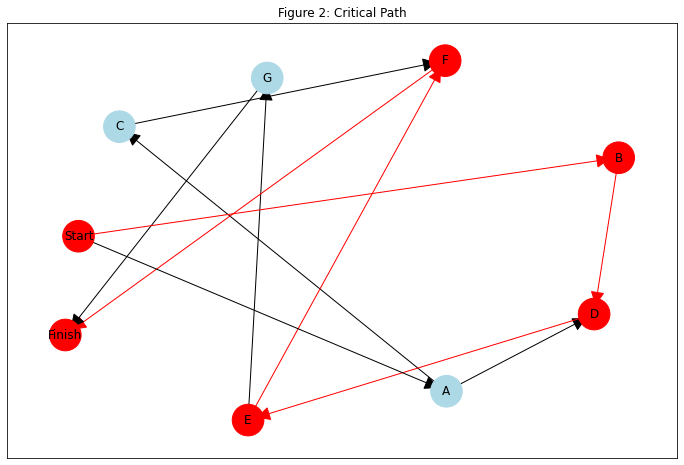

In [10]:
# Plot the Critical Path
G2 = G.copy()
plot_title = "Figure 2: Critical Path"
plt.figure(plot_title, figsize=(12,8))  
plt.title(plot_title)
draw_critical_path(G2, mydata)
plt.savefig("Critical_Path.png")

In [11]:
# Display results
columns = {
    'CODE': ['TASKS', 'ES', 'EF', 'LS', 'LF', 'SLACK', 'CRITICAL'],
    'NAME': ['Activity', 'ES', 'EF', 'LS', 'LF', 'Slack Value', 'Is Critical']
}

data = remove_start_finish_data(mydata)
df = pd.DataFrame(data, columns=columns['CODE'])
display(HTML(df.to_html(index=False)))

other_data = {
    "Project Completion Time:" : [completion_time],
    "Critical Path:" : [critical_path]
}
df2 = pd.DataFrame.from_dict(other_data, orient="index")
display(HTML(df2.to_html(header=False)))

TASKS,ES,EF,LS,LF,SLACK,CRITICAL
A,0.0,7.0,2.0,9.0,2.0,NO
B,0.0,9.0,0.0,9.0,0.0,YES
C,7.0,19.0,14.0,26.0,7.0,NO
D,9.0,17.0,9.0,17.0,0.0,YES
E,17.0,26.0,17.0,26.0,0.0,YES
F,26.0,32.0,26.0,32.0,0.0,YES
G,26.0,31.0,27.0,32.0,1.0,NO


Project Completion Time:,32.0
Critical Path:,B->D->E->F
